## Plotting characteristics of authors who left publishing versus when they did not

Update (1/6/24): This is an old file that I am now updating to create the new plot

------

In [1]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from matplotlib.patches import Rectangle

# Importing relevant packages

import os
import numpy as np

from config_reader import read_config

In [2]:
# Reading paths
paths = read_config()
# Path to where we will save our processed files
INDIR = paths['PROCESSED_FOLDER_LOCAL']
# Path to where we will save our processed files
OUTDIR = paths['PLOTS_FOLDER_LOCAL']

In [3]:
# Reading relevant files

# Reading authors in our new filtered sample
df_main = pd.read_csv(INDIR+"RW_authors_w_confounders_filteredSample_postNHB_BedoorsCorrections_Augmented.csv")

# Only extracting those with single retraction
df_main = df_main[df_main['nRetracted']==1]

# Just because ..
df_main['Attrition'] = df_main['AttritedClass']

df_main.columns.tolist()

/var/folders/bf/_6xjm2bn2_n17hfhskyq1pmw0000gp/T/ipykernel_39037/406725600.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv(INDIR+"RW_authors_w_confounders_filteredSample_postNHB_BedoorsCorrections_Augmented.csv")


['MAGAID',
 'MAGAuthorName',
 'Record ID',
 'MAGPID',
 'RetractionYear',
 'nRetracted',
 'dateobject',
 'JID',
 'CSID',
 'JournalName',
 'ConferenceSeriesName',
 'ReasonPropagatedMajorityOfMajority',
 'NumAuthorsInRetractedPaper',
 'GenderizeGender',
 'GenderizeConfidence',
 'MAGAuthorOrder',
 'FirstPubMAGPID',
 'MAGFirstPubYear',
 'AcademicAgeAtRetraction',
 'MAGCumPapersYearAtRetraction',
 'MAGCumPapersAtRetraction',
 'MAGCumCitationsYearAtRetraction',
 'MAGCumCitationsAtRetraction',
 'MAGCumCollaboratorsYearAtRetraction',
 'MAGCumCollaboratorsAtRetraction',
 'MAGRetractionYearAffID',
 'MAGRetractionYearAffRank',
 'MAGRetractionYearAffYear',
 'MAGrootFID',
 'MAGrootFIDMaxPercent',
 'YearsActive',
 'OriginalPaperDate',
 'OriginalPaperYear',
 'AttritedClass',
 'AttritedClassRobust',
 'MAGJCName',
 'MAGJournalType',
 'SJRScoreRetractedPaperYear',
 'SJRQuartileRetractedPaperYear',
 'DemiDecade',
 'MAGAuthorOrderCategorical',
 'MAGFieldName',
 'Field_art',
 'Field_biology',
 'Field_busine

In [4]:
df_main['MAGAID'] = df_main['MAGAID'].astype(int)

In [5]:
# Computing Years Active 
df_main['YearsActive'] = df_main['YearOfAttrition']-df_main['RetractionYear']

# When year of attrition == -1, we do not know the years active, so we won't plot them
df_main.loc[df_main['YearOfAttrition'] == -1, 'YearsActive'] = np.nan

df_main.head(1)

,MAGAID,MAGAuthorName,Record ID,MAGPID,RetractionYear,nRetracted,dateobject,JID,CSID,JournalName,...,AltmetricScoreAtRetraction,AltmetricScorePreRetraction,AltmetricScorePostRetraction,MAGFirstAffID,FirstAffRank,FirstAffRankCorrected,YearOfAttrition,MAGFirstAffiliationRank,RetractorMajority,Attrition
0,2127983451,william r jacobs,2343,1790891469,1997.0,1,1994-07-01,133274750.0,NaN,journal of bacteriology,...,0.0,3.0,6.0,204465549.0,22.0,22.0,-1.0,22,NaN,0


In [6]:
# Checking number of NaNs
df_main[['MAGAID','YearsActive']].drop_duplicates()['YearsActive'].value_counts(dropna=False)

YearsActive
 NaN     9354
 0.0     1516
-1.0      884
-2.0      426
 1.0      352
         ... 
-59.0       1
 12.0       1
-65.0       1
-64.0       1
-60.0       1
Name: count, Length: 83, dtype: int64

In [7]:
# Checking how many attrited
df_main[['MAGAID','Attrition']].drop_duplicates()['Attrition'].value_counts()

Attrition
 0    10342
 1     2400
-1     1837
Name: count, dtype: int64

In [8]:
df_main.columns

Index(['MAGAID', 'MAGAuthorName', 'Record ID', 'MAGPID', 'RetractionYear',
       'nRetracted', 'dateobject', 'JID', 'CSID', 'JournalName',
       ...
       'AltmetricScoreAtRetraction', 'AltmetricScorePreRetraction',
       'AltmetricScorePostRetraction', 'MAGFirstAffID', 'FirstAffRank',
       'FirstAffRankCorrected', 'YearOfAttrition', 'MAGFirstAffiliationRank',
       'RetractorMajority', 'Attrition'],
      dtype='object', length=137)

In [8]:
# Renaming columns
df_main = df_main.rename(columns={'RetractedPaperMAGPID':'MAGPID',
                                 'FieldName':'MAGFieldName',
                                 'AcademicAge': 'AcademicAgeAtRetraction',
                                 'AffRank': 'MAGRetractionYearAffRank',
                                 'NumAuthorsInRetractedPaperRW':'NumAuthorsInRetractedPaper',
                                 'cumPapers':'MAGCumPapersAtRetraction',
                                 'cumCitations':'MAGCumCitationsAtRetraction',
                                 'cumCollaborators':'MAGCumCollaboratorsAtRetraction',
                                 'SJR':'SJRScoreRetractedPaperYear',
                                 'SJR Best Quartile':'SJRQuartileRetractedPaperYear'})

# I did this as I did not want to replace and rewrite the code
df_main['YearsActiveNew'] = df_main['YearsActive']
# Same here..
df_main['AttritionNew'] = df_main['Attrition']

# Only extracting relevant columns
relevant_columns = ['Record ID', 'MAGPID', 'MAGAID', 'MAGFieldName', 
                   'GenderizeGender', 'AcademicAgeAtRetraction', 'MAGRetractionYearAffRankOrdinal',
                   'ReasonPropagatedMajorityOfMajority', 'NumAuthorsInRetractedPaper', 
                   'MAGAuthorOrderCategorical', 'RetractionYear', 'DemiDecade',
                   'MAGJournalType', 'MAGCumPapersAtRetraction', 'MAGCumCitationsAtRetraction',
                   'MAGCumCollaboratorsAtRetraction', 'SJRQuartileRetractedPaperYear','SJRScoreRetractedPaperYear',
                   'Attrition','AttritionNew', 'YearsActiveNew',
                   'YearOfAttrition']

df_relevant = df_main[relevant_columns].drop_duplicates()



df_relevant_w_lastactivity = df_relevant

# 0 means non-attrited, 1 means attrited, -1 means attrited due to something else
df_relevant[['MAGAID','AttritionNew']].drop_duplicates()['AttritionNew'].value_counts() 

AttritionNew
 0    10342
 1     2400
-1     1837
Name: count, dtype: int64

In [10]:
# Some Pre-processing

# Processing fields so that we only plot those with >= 5 % population

# Classifying fields with < 5% as other stem and non-stem
other_stem_fields = ['materials science', 'computer science',
                'engineering', 'mathematics', 'psychology',
                'economics', 'environmental science', 'geography','sociology',
                'political science', 'geology']


non_stem_fields = ['philosophy','business',
                  'history','art']

df_relevant_w_lastactivity['MAGFieldName'] = df_relevant_w_lastactivity['MAGFieldName']\
                                                   .replace(dict.fromkeys(other_stem_fields, 'other STEM fields'))\
                                                    .replace(dict.fromkeys(non_stem_fields,'non-STEM fields'))


# Preprocessing affiliation ranks
df_relevant_w_lastactivity['MAGRetractionYearAffRank'] = df_relevant_w_lastactivity['MAGRetractionYearAffRankOrdinal']\
                                                .replace([rank for rank in range(101)], '1-100')\
                                                .replace([rank for rank in range(101,501)], 
                                                         '101-500')\
                                                .replace([rank for rank in range(501,1001)], 
                                                         '501-1000')\
                                                .replace(1500, '>1000')

# Preprocessing Journal Quartile
df_relevant_w_lastactivity['SJRQuartileRetractedPaperYear'] = df_relevant_w_lastactivity['SJRQuartileRetractedPaperYear']\
                                        .replace({1.0:'Q1',
                                                 2.0:'Q2',
                                                 3.0:'Q3',
                                                 4.0:'Q4'})\
                                        .fillna('NA')


df_attrited = df_relevant_w_lastactivity[df_relevant_w_lastactivity['AttritionNew'] == 1]

df_nonattrited = df_relevant_w_lastactivity[df_relevant_w_lastactivity['AttritionNew'] == 0]


df_relevant_w_lastactivity


,Record ID,MAGPID,MAGAID,MAGFieldName,GenderizeGender,AcademicAgeAtRetraction,MAGRetractionYearAffRankOrdinal,ReasonPropagatedMajorityOfMajority,NumAuthorsInRetractedPaper,MAGAuthorOrderCategorical,...,MAGCumPapersAtRetraction,MAGCumCitationsAtRetraction,MAGCumCollaboratorsAtRetraction,SJRQuartileRetractedPaperYear,SJRScoreRetractedPaperYear,Attrition,AttritionNew,YearsActiveNew,YearOfAttrition,MAGRetractionYearAffRank
0,2343,1790891469,2127983451,biology,male,21.0,89.0,mistake,5.0,First or Last or Only Author,...,109,2441.0,266.0,NA,NaN,0,0,NaN,-1.0,1-100
5,3294,2339456987,1986180616,biology,male,17.0,175.0,misconduct,5.0,First or Last or Only Author,...,109,1478.0,246.0,NA,NaN,0,0,NaN,-1.0,101-500
8,3489,1978992330,2134970185,biology,male,20.0,1500.0,mistake,10.0,Middle Author,...,253,1966.0,338.0,NA,NaN,0,0,NaN,-1.0,>1000
9,3631,2009868552,2600580187,biology,male,7.0,28.0,mistake,3.0,First or Last or Only Author,...,29,574.0,22.0,NA,NaN,0,0,10.0,2008.0,1-100
11,2202,1958327809,257122240,biology,male,25.0,1.0,misconduct,4.0,First or Last or Only Author,...,252,5008.0,249.0,NA,NaN,0,0,NaN,-1.0,1-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28857,4885,2078164144,1826158756,other STEM fields,male,3.0,1500.0,mistake,4.0,Middle Author,...,2,9.0,4.0,Q1,0.785,1,1,-1.0,2012.0,>1000
28858,16929,1970421558,268272321,other STEM fields,male,0.0,450.0,misconduct,4.0,Middle Author,...,1,1.0,3.0,NA,NaN,1,1,0.0,2012.0,101-500
28859,2071,2108644616,2768061868,other STEM fields,male,1.0,1500.0,misconduct,3.0,Middle Author,...,1,1.0,2.0,Q1,1.772,0,0,NaN,-1.0,>1000
28860,8363,1420593637,2639980879,other STEM fields,male,1.0,1500.0,plagiarism,3.0,First or Last or Only Author,...,2,0.0,5.0,NA,NaN,1,1,0.0,2014.0,>1000


In [11]:
df_relevant_w_lastactivity[['MAGAID','MAGRetractionYearAffRank']].drop_duplicates()

,MAGAID,MAGRetractionYearAffRank
0,2127983451,1-100
5,1986180616,101-500
8,2134970185,>1000
9,2600580187,1-100
11,257122240,1-100
...,...,...
28791,384584067,>1000
28810,2776957463,101-500
28812,2115767897,101-500
28821,582542066,>1000


In [12]:
df_relevant_w_lastactivity[~df_relevant_w_lastactivity.YearsActiveNew.isna()].MAGAID.nunique()

5225

In [13]:
df_relevant_w_lastactivity[df_relevant_w_lastactivity.YearsActiveNew.isna()].MAGAID.nunique()

9354

In [14]:
df_attrited.MAGAID.nunique()

2400

In [15]:
df_nonattrited.MAGAID.nunique()

10342

In [16]:
df_attrited[['MAGAID','MAGCumCitationsAtRetraction']].drop_duplicates()['MAGCumCitationsAtRetraction'].describe()

count    2400.000000
mean       43.695417
std       203.497055
min         0.000000
25%         0.000000
50%         2.000000
75%        16.000000
max      4769.000000
Name: MAGCumCitationsAtRetraction, dtype: float64

In [17]:
df_nonattrited[['MAGAID','MAGCumCitationsAtRetraction']].drop_duplicates()['MAGCumCitationsAtRetraction'].describe()

count    10342.000000
mean      1180.049023
std       3094.166664
min          0.000000
25%         31.000000
50%        210.000000
75%        955.750000
max      66877.000000
Name: MAGCumCitationsAtRetraction, dtype: float64

In [18]:
df_attrited[['MAGAID','MAGCumPapersAtRetraction']].drop_duplicates()['MAGCumPapersAtRetraction'].describe()

count    2400.000000
mean        4.756250
std        11.107426
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       218.000000
Name: MAGCumPapersAtRetraction, dtype: float64

In [19]:
df_nonattrited[['MAGAID','MAGCumPapersAtRetraction']].drop_duplicates()['MAGCumPapersAtRetraction'].describe()

count    10342.000000
mean        69.285245
std        111.715943
min          1.000000
25%         10.000000
50%         30.000000
75%         79.000000
max       1518.000000
Name: MAGCumPapersAtRetraction, dtype: float64

In [20]:
df_attrited[['MAGAID','MAGCumCollaboratorsAtRetraction']].drop_duplicates()['MAGCumCollaboratorsAtRetraction'].describe()

count    2400.000000
mean       13.633333
std        40.423876
min         0.000000
25%         3.000000
50%         6.000000
75%        12.250000
max      1158.000000
Name: MAGCumCollaboratorsAtRetraction, dtype: float64

In [21]:
df_nonattrited[['MAGAID','MAGCumCollaboratorsAtRetraction']].drop_duplicates()['MAGCumCollaboratorsAtRetraction'].describe()



count    10342.000000
mean       197.564881
std        605.611923
min          0.000000
25%         23.000000
50%         65.000000
75%        177.000000
max      20543.000000
Name: MAGCumCollaboratorsAtRetraction, dtype: float64

In [22]:
df_main[df_main['AttritedClass'].eq(-1)]['MAGAID'].nunique()

1837

In [23]:
df_attrited['YearsActiveNew'].value_counts()

YearsActiveNew
 0.0    3276
-1.0    1984
Name: count, dtype: int64

In [24]:
df_main['MAGAID'].nunique()

14579

# Author related features

## Distribution of authors' last activity

In [25]:
# Code for creating the bar plot

def create_attrition_barplot(axesi, ticksize, labelsize, attrited_color,
                        nonattrited_color, other_color):
    
    # Only extracting relevant dataframe
    
    # Computing the groups
    df_grouped_values_treatment = df_relevant_w_lastactivity[['MAGAID','YearsActiveNew']]\
                .drop_duplicates()\
                .groupby('YearsActiveNew')['MAGAID'].nunique().reset_index()
    
    # Computing number of authors in our set
    num_authors = df_relevant_w_lastactivity[~df_relevant_w_lastactivity.YearsActiveNew.isna()]\
                            .MAGAID.nunique()
    
    # Getting Percentage of retracted scientists
    df_grouped_values_treatment['Percentage of Retracted Scientists'] = \
        round(df_grouped_values_treatment['MAGAID']*100.0/num_authors,10)
    
    print("Percentage outside of range",df_grouped_values_treatment[df_grouped_values_treatment['YearsActiveNew'].lt(-10)
                                     | df_grouped_values_treatment['YearsActiveNew'].gt(10)]
         ['Percentage of Retracted Scientists'].sum())
    
    # Filtering to only include authors within certain years range
    df_grouped_values_treatment = df_grouped_values_treatment[\
                                df_grouped_values_treatment['Percentage of Retracted Scientists'].gt(0) & 
                                df_grouped_values_treatment['YearsActiveNew'].ge(-10) & 
                                df_grouped_values_treatment['YearsActiveNew'].le(10)]
    
    df_grouped_values_treatment['YearsActiveNew'] = df_grouped_values_treatment['YearsActiveNew'].astype(int)

    # Setting colors for bars
    
    colors = [other_color if (x < -1) else (nonattrited_color if (x > 0) else attrited_color) \
                  for x in df_grouped_values_treatment['YearsActiveNew'].tolist()]


    barplot_treatment = sns.barplot(data=df_grouped_values_treatment, ax=axesi,
                            x='YearsActiveNew', y="Percentage of Retracted Scientists", palette=colors,
                                   saturation=1)

    barplot_treatment.tick_params(labelsize=ticksize)

    for item in barplot_treatment.get_xticklabels():
        item.set_rotation(60)

    for patch in barplot_treatment.patches:
        
        value = patch.get_height()
        if(value >= 1.5):
            barplot_treatment.annotate(format(value, '.1f'), 
                           (patch.get_x() + patch.get_width() / 2., patch.get_height()+1), 
                           ha = 'center', va = 'center', fontsize=labelsize, weight='regular',
                           xytext = (0, 9), 
                           textcoords = 'offset points')

    barplot_treatment.set_xlabel('year of last publication since retraction (year 0)', 
                          fontsize=labelsize)

    barplot_treatment.set_ylabel('% of retracted \nauthors who left', fontsize=labelsize)
    
    barplot_treatment.axvline(10, ymax=0.80, color='black', lw=2, linestyle='--')
    
    barplot_treatment.set_ylim(0,35)
    
    sns.despine()

Percentage outside of range 11.081339713000002


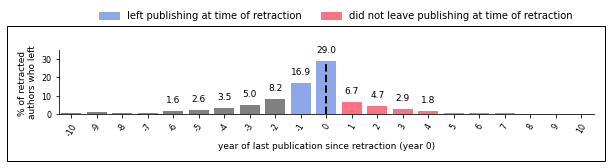

In [26]:
import matplotlib.patches as patches

attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (8.3,1.7)

fig, axesi = plt.subplots()

ticksize = 8
labelsize = 9

create_attrition_barplot(axesi, ticksize, labelsize, attrited_color,
                        nonattrited_color, other_color)

# Create a custom legend with two squares
blue_square = plt.Line2D([], [], color=attrited_color, marker='s', markersize=10, label='left publishing at time of retraction')
red_square = plt.Line2D([], [], color=nonattrited_color, marker='s', markersize=10, label='did not leave publishing at time of retraction')

rect = Rectangle((0, 0), 1, 1.1, transform=fig.transFigure, fill=False, edgecolor='black')

fig.patches.append(rect)


legend_handles = [patches.Rectangle((0,0),1,1, color=attrited_color),
                  patches.Rectangle((0,0),1,1, color=nonattrited_color)]

legend_labels = ['left publishing at time of retraction', 'did not leave publishing at time of retraction']

fig.legend(handles=legend_handles, labels=legend_labels, loc='upper center', ncol=2,
          bbox_to_anchor=(0.55, 1.3), frameon=False)

plt.tight_layout()

plt.savefig('attrition_barplot_postNHB.pdf',format='pdf', bbox_inches='tight')


In [27]:
df_nonattrited['MAGAID'].nunique()

10342

In [28]:
df_attrited['MAGAID'].nunique()

2400

## Distribution of authors' disciplines

In [29]:
def create_discipline_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    
    field_of_interest = 'MAGFieldName'
    # Extracting number of authors and their percentage in each discipline
    # For attrited
    num_authors_discipline_attrited = df_attrited[['MAGAID','MAGFieldName']]\
                                    .drop_duplicates().shape[0]

    df_attrited_discipline_percent = (df_attrited[['MAGAID','MAGFieldName']]\
        .drop_duplicates().MAGFieldName.value_counts()*100/num_authors_discipline_attrited)\
        .reset_index().rename(columns={'index':'MAGFieldName','count':'Percentage'})
    # For nonattrited
    num_authors_discipline_nonattrited = df_nonattrited[['MAGAID','MAGFieldName']]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_discipline_percent = (df_nonattrited[['MAGAID','MAGFieldName']]\
            .drop_duplicates().MAGFieldName.value_counts()*100/num_authors_discipline_nonattrited)\
            .reset_index().rename(columns={'index':'MAGFieldName','count':'Percentage'})
    
    
    # Creating an order
    elements = ['biology','chemistry','medicine','physics', 'other STEM fields', 'non-STEM fields']
    #elements = df_attrited['MAGFieldName'].unique().tolist()
    mapping = {elem: i for i, elem in enumerate(elements)}
    key_attrited = df_attrited_discipline_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_discipline_percent[field_of_interest].map(mapping)
    
    df_attrited_discipline_percent = df_attrited_discipline_percent.iloc[key_attrited.argsort()]
    df_nonattrited_discipline_percent = df_nonattrited_discipline_percent.iloc[key_nonattrited.argsort()]
    
    print(df_attrited_discipline_percent)
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_discipline_percent.MAGFieldName.nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_discipline_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_discipline_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('discipline', fontsize=labelsize)
    axesi.set_xlabel('% authors', fontsize=labelsize)

    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)

    #ax.set_xticks(x, labels)
    # ax.legend()
    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,15,30,45])
    
    axesi.tick_params(labelsize=ticksize)
    
    axesi.set_yticklabels(elements)

    #axesi.set_yticklabels(['biology','chemistry','medicine','physics', 'other STEM\n fields', 'non-STEM\n fields'])
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()
    
    plt.tight_layout()

        MAGFieldName  Percentage
0            biology   28.965517
2          chemistry   20.041797
1           medicine   22.528736
4            physics    8.213166
3  other STEM fields   18.307210
5    non-STEM fields    1.943574


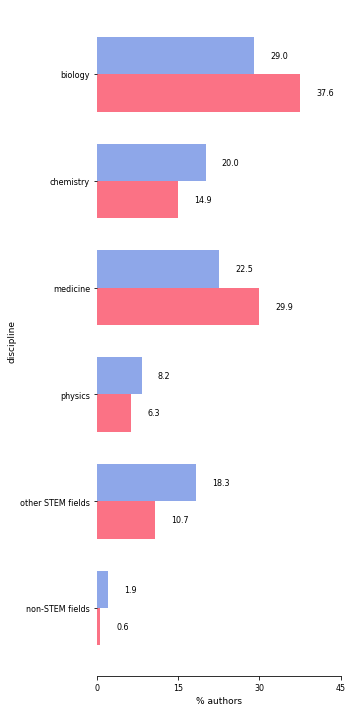

In [30]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (5,10)

fig, axesi = plt.subplots()

ticksize = 8
labelsize = 9

barwidth = 0.35

create_discipline_plot(axesi, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

In [31]:
df_concatenated = pd.concat([df_attrited, df_nonattrited])

num_authors_discipline_concatenated = df_concatenated[['MAGAID','MAGFieldName']]\
                                    .drop_duplicates().shape[0]

(df_concatenated[['MAGAID','MAGFieldName']]\
            .drop_duplicates().MAGFieldName.value_counts()*100/num_authors_discipline_concatenated)\
            .reset_index().rename(columns={'index':'MAGFieldName','MAGFieldName':'Percentage'})

,Percentage,count
0,biology,35.251353
1,medicine,27.902390
2,chemistry,16.298467
3,other STEM fields,12.781785
4,physics,6.807935
5,non-STEM fields,0.958070


## Distribution of authors' gender

In [32]:
def create_gender_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'GenderizeGender'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGAID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGAID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('gender', fontsize=labelsize)
    axesi.set_xlabel('% authors', fontsize=labelsize)

    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)

    #ax.set_xticks(x, labels)
    # ax.legend()
    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,20,40,60,80])
    
    axesi.tick_params(labelsize=ticksize)

    axesi.set_yticklabels(df_nonattrited_percent[field_of_interest].tolist())
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()
    
    plt.tight_layout()


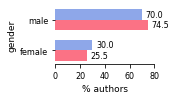

In [33]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (2.53,1.5)

fig, axesi = plt.subplots()

ticksize = 8
labelsize = 9

barwidth = 0.35


create_gender_plot(axesi, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

## Distribution of authors' order

In [34]:
def create_authororder_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'MAGAuthorOrderCategorical'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGAID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGAID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('author order', fontsize=labelsize)
    axesi.set_xlabel('% authors', fontsize=labelsize)

    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,20,40,60,80])
    
    axesi.tick_params(labelsize=ticksize)
    
    ytick_dict = {'First or Last or Only Author': 'first or last\nauthor',
                 'Middle Author': 'middle\nauthor'}
    
    yticklabels = [ytick_dict.get(item, item) for item in df_nonattrited_percent[field_of_interest].tolist()]
    
    axesi.set_yticklabels(yticklabels)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()
    
    plt.tight_layout()

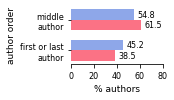

In [35]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (2.53,1.5)

fig, axesi = plt.subplots()

ticksize = 8
labelsize = 9

barwidth = 0.35

create_authororder_plot(axesi, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

## Distribution of authors' affiliation ranking

In [36]:
def create_affrank_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'MAGRetractionYearAffRank'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGAID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGAID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    # Creating an order
    affranks = ['1-100','101-500','501-1000','>1000']
    mapping = {affrank: i for i, affrank in enumerate(affranks)}
    key_attrited = df_attrited_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_percent[field_of_interest].map(mapping)
    
    df_attrited_percent = df_attrited_percent.iloc[key_attrited.argsort()]
    df_nonattrited_percent = df_nonattrited_percent.iloc[key_nonattrited.argsort()]
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('affiliation rank', fontsize=labelsize)
    axesi.set_xlabel('% authors', fontsize=labelsize)

    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)

    #ax.set_xticks(x, labels)
    # ax.legend()
    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,20,40, 60])
    
    axesi.tick_params(labelsize=ticksize)
    
    yticklabels = df_nonattrited_percent[field_of_interest].tolist()
    
    axesi.set_yticklabels(yticklabels)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()
    
    plt.tight_layout()

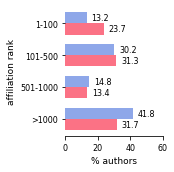

In [37]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (2.53,2.5)

fig, axesi = plt.subplots()

ticksize = 8
labelsize = 9

barwidth = 0.35

create_affrank_plot(axesi, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

In [38]:
df_nonattrited.MAGRetractionYearAffRank.value_counts()

MAGRetractionYearAffRank
>1000       4299
101-500     4115
1-100       2991
501-1000    1830
Name: count, dtype: int64

## Plotting Continuous: KDE plot

In [39]:
def plotPvalue(ax, x, y, pVal, gap, lw=0.2, c='black'):
    """
    This function will be used to plot the p-values. 
    """
    
    height = max(y[0], y[1])
    
    handles_y0 = height + gap[0]
    handles_y1 = height + gap[1]
    
    ax.hlines(handles_y1, x[0], x[1], color=c, lw=lw)
    ax.vlines(x[0], handles_y0, handles_y1, color=c, lw=lw)
    ax.vlines(x[1], handles_y0, handles_y1, color=c, lw=lw)
    
    stars = '***' if pVal < 0.001 else '**' if pVal < 0.01 else '*' if pVal < 0.05 else f'p={round(pVal, 2)}'
    offset = 0.01 if pVal < 0.05 else 0.04
    
    ax.text((x[0] + x[1])/2, handles_y1, stars, ha='center', color=c)

In [40]:
## Code for plotting continuous values as well as the means and statistical significance test

def create_continuous_plot(field_of_interest, xlabel, axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color, remove_outliers=True, xlim=False,
                          handle_gaps=[0,0]):
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    df_relevant_attrited = df_attrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates()
    
    df_relevant_attrited['AuthorType'] = 'attrited'
    
    # For nonattrited
    df_relevant_nonattrited = df_nonattrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates()
    
    df_relevant_nonattrited['AuthorType'] = 'nonattrited'
    
    print("Attrited:",df_relevant_attrited.MAGAID.nunique())
    print("NonAttrited:",df_relevant_nonattrited.MAGAID.nunique())
    
    
    # Removing outliers (top 1%)
    
    if(remove_outliers):
    
        df_relevant_attrited = df_relevant_attrited[df_relevant_attrited[field_of_interest].\
                                            le(df_relevant_attrited[field_of_interest].quantile(.99))]

        df_relevant_nonattrited = df_relevant_nonattrited[df_relevant_nonattrited[field_of_interest].\
                                            le(df_relevant_nonattrited[field_of_interest].quantile(.99))]
    
    df_relevant_all = pd.concat([df_relevant_attrited,df_relevant_nonattrited])
    
    
    sns.kdeplot(data=df_relevant_all, x=field_of_interest,
                fill=True, alpha=0.6, linewidth=0, palette=[attrited_color, nonattrited_color],
                ax=axesi, hue='AuthorType', hue_order=['attrited','nonattrited'], cut=0)
    
    # Plotting means
    
    min_ylim, max_ylim = axesi.get_ylim()
    min_xlim, max_xlim = axesi.get_xlim()
    
    print(min_ylim, max_ylim)
    print(min_xlim, max_xlim)
    
    axesi.axvline(df_relevant_attrited[field_of_interest].mean(), 
                  0,0.85, color=attrited_color, 
                  linestyle='dashed', linewidth=1.5)
    
    axesi.axvline(df_relevant_nonattrited[field_of_interest].mean(), 
                  0,0.85,color=nonattrited_color, 
                  linestyle='dashed', linewidth=1.5)
    
    
    # Now we plot p-values
    _, pval = ttest_ind(df_relevant_attrited[field_of_interest], 
                     df_relevant_nonattrited[field_of_interest], equal_var=False)
    
    plotPvalue(axesi, [df_relevant_attrited[field_of_interest].mean(),
                      df_relevant_nonattrited[field_of_interest].mean()], 
                     [max_ylim,max_ylim], pval, handle_gaps, lw=0.1, c='black')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('Author Density', fontsize=labelsize)
    axesi.set_xlabel(xlabel, fontsize=labelsize)
    
    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)
    
    axesi.set_facecolor('white')
    axesi.get_legend().remove()

    if(xlim):
        axesi.set_xlim(xlim[0],xlim[1])
    
    axesi.tick_params(labelsize=ticksize)
    
    # Fixing xticks to remove anything below 0
    
    new_xticks = list(filter(lambda xtick: xtick >=0, axesi.get_xticks()))
    axesi.set_xticks(new_xticks)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)
    

## Distribution of Papers

Attrited: 2400
NonAttrited: 10342
0.0 0.04130447608104163
-25.8 563.8


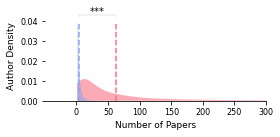

In [41]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (4,2)

fig, axesi = plt.subplots()

def create_papers_plot():

    ticksize = 8
    labelsize = 9

    barwidth = 0.35

    field_of_interest = 'MAGCumPapersAtRetraction'
    xlabel = 'Number of Papers'

    create_continuous_plot(field_of_interest, xlabel, axesi, barwidth, ticksize, labelsize,
                           attrited_color, nonattrited_color, other_color, remove_outliers=True, xlim=[-50,300],
                          handle_gaps=[0.001,0.002])
    

create_papers_plot()
plt.tight_layout()

## Distribution of Citations

Attrited: 2400
NonAttrited: 10342
0.0 0.003728802905544883
-680.35 14287.35


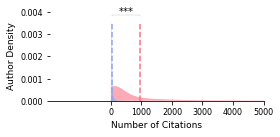

In [42]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (4,2)

fig, axesi = plt.subplots()

def create_citations_plot():

    ticksize = 8
    labelsize = 9

    barwidth = 0.35

    field_of_interest = 'MAGCumCitationsAtRetraction'
    xlabel = 'Number of Citations'

    create_continuous_plot(field_of_interest, xlabel, axesi, barwidth, ticksize, labelsize,
                           attrited_color, nonattrited_color, other_color, remove_outliers=True, xlim=[-2000,5000],
                          handle_gaps=[0.0001,0.00015])

create_citations_plot()
plt.tight_layout()

## Distribution of Collaborators

Attrited: 2400
NonAttrited: 10342
0.0 0.01335951997295728
-95.9 2013.9


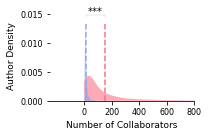

In [43]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (3,2)

fig, axesi = plt.subplots()

def create_collaborators_plot():

    ticksize = 8
    labelsize = 9

    field_of_interest = 'MAGCumCollaboratorsAtRetraction'
    xlabel = 'Number of Collaborators'

    create_continuous_plot(field_of_interest, xlabel, axesi, barwidth, ticksize, labelsize,
                           attrited_color, nonattrited_color, other_color, remove_outliers=True, xlim=[-250,750],
                          handle_gaps=[0.001,0.0015])


create_collaborators_plot()
    
plt.tight_layout()

## Distribution of Career Age

Attrited: 2400
NonAttrited: 10342
0.0 0.05728539631048286
-2.25 47.25


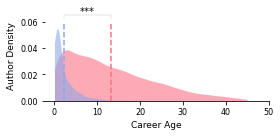

In [44]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (4,2)

fig, axesi = plt.subplots()

def create_age_plot():

    ticksize = 8
    labelsize = 9

    barwidth = 0.35

    field_of_interest = 'AcademicAgeAtRetraction'
    xlabel = 'Career Age'

    create_continuous_plot(field_of_interest, xlabel, axesi, barwidth, ticksize, labelsize,
                           attrited_color, nonattrited_color, other_color, remove_outliers=True,
                          handle_gaps=[0.005,0.008])

    
create_age_plot()
plt.tight_layout()

## Plotting Continuous: Boxplots

In [45]:
df_nonattrited['MAGCumCollaboratorsAtRetraction'].describe()

count    13235.000000
mean       162.395164
std        542.795812
min          0.000000
25%         15.000000
50%         46.000000
75%        136.500000
max      20543.000000
Name: MAGCumCollaboratorsAtRetraction, dtype: float64

In [46]:
df_attrited['MAGCumCollaboratorsAtRetraction'].describe()

count    5260.000000
mean       10.167110
std        28.364268
min         0.000000
25%         3.000000
50%         6.000000
75%        10.000000
max      1158.000000
Name: MAGCumCollaboratorsAtRetraction, dtype: float64

In [47]:
## Code for plotting continuous values as well as the means and statistical significance test

def create_box_plot(field_of_interest, ylabel, axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color, remove_outliers=True, xlim=False,
                          handle_gaps=[0,0]):
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    df_relevant_attrited = df_attrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates()
    
    # For nonattrited
    df_relevant_nonattrited = df_nonattrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates()
    
    
    linewidth = 1
    width = 0.20

    bp_attrited = dict(color=attrited_color, linestyle='-', linewidth=linewidth)
    bp_nonattrited = dict(color=nonattrited_color, linestyle='-', linewidth=linewidth)

    # median props
    mp_attrited = dict(linestyle='-', linewidth=linewidth, color=attrited_color)
    mp_nonattrited = dict(linestyle='-', linewidth=linewidth, color=nonattrited_color)

    # mean props
    mep_attrited = dict(marker='s', markerfacecolor=attrited_color, markeredgecolor=attrited_color)
    mep_nonattrited = dict(marker='s', markerfacecolor=nonattrited_color, markeredgecolor=nonattrited_color)
    
    axesi.boxplot(df_relevant_attrited[field_of_interest], 
                  positions=[0], labels=['attrited'], 
            boxprops=bp_attrited, medianprops=mp_attrited, showfliers=False, showmeans=True, 
            meanprops=mep_attrited, widths=width)

    axesi.boxplot(df_relevant_nonattrited[field_of_interest], 
                  positions=[1], labels=['non-attrited'], 
            boxprops=bp_nonattrited, medianprops=mp_nonattrited, showfliers=False, showmeans=True, 
            meanprops=mep_nonattrited, widths=width)
    
    # Now we plot p-values
    _, pval = ttest_ind(df_relevant_attrited[field_of_interest], 
                     df_relevant_nonattrited[field_of_interest], equal_var=False)
    
    q1_attrited = df_relevant_attrited[field_of_interest].quantile(.25)
    q3_attrited = df_relevant_attrited[field_of_interest].quantile(.75)
    iqr_attrited = q3_attrited-q1_attrited
    
    q1_nonattrited = df_relevant_nonattrited[field_of_interest].quantile(.25)
    q3_nonattrited = df_relevant_nonattrited[field_of_interest].quantile(.75)
    iqr_nonattrited = q3_nonattrited-q1_nonattrited
    
    plotPvalue(axesi, [0,1], 
               [q3_attrited+1.5*iqr_attrited,
                q3_nonattrited+1.5*iqr_nonattrited],
                pval, handle_gaps, lw=0.1, c='black')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel(ylabel, fontsize=ticksize)
    
    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)
    
    axesi.tick_params(labelsize=ticksize)
    
    axesi.get_xaxis().set_ticks([])
    
    axesi.set_facecolor('white')
    
    axesi.spines[['right', 'top']].set_visible(False)

## Distribution of Papers

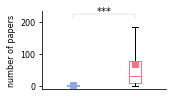

In [48]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (2.5,1.5)

fig, axesi = plt.subplots()

def create_papers_boxplot(axesi):

    ticksize = 8
    labelsize = 9

    barwidth = 0.35

    field_of_interest = 'MAGCumPapersAtRetraction'
    ylabel = 'number of papers'

    create_box_plot(field_of_interest, ylabel, axesi, barwidth, ticksize, labelsize,
                           attrited_color, nonattrited_color, other_color, remove_outliers=True,
                          handle_gaps=[25,40])

create_papers_boxplot(axesi)
plt.tight_layout()

## Distribution of Citations

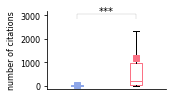

In [49]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (2.5,1.5)

fig, axesi = plt.subplots()

def create_citations_boxplot(axesi):

    ticksize = 8
    labelsize = 9

    barwidth = 0.35

    field_of_interest = 'MAGCumCitationsAtRetraction'
    ylabel = 'number of citations'

    create_box_plot(field_of_interest, ylabel, axesi, barwidth, ticksize, labelsize,
                           attrited_color, nonattrited_color, other_color, remove_outliers=True,
                          handle_gaps=[500,700])

create_citations_boxplot(axesi)
plt.tight_layout()

## Distribution of Collaborators

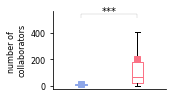

In [50]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (2.5,1.5)

fig, axesi = plt.subplots()

def create_collaborators_boxplot(axesi):

    ticksize = 8
    labelsize = 9

    barwidth = 0.35

    field_of_interest = 'MAGCumCollaboratorsAtRetraction'
    ylabel = 'number of \ncollaborators'

    create_box_plot(field_of_interest, ylabel, axesi, barwidth, ticksize, labelsize,
                           attrited_color, nonattrited_color, other_color, remove_outliers=True,
                          handle_gaps=[100,130])

create_collaborators_boxplot(axesi)
plt.tight_layout()

## Distribution of Career Age

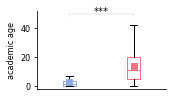

In [51]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (2.5,1.5)

fig, axesi = plt.subplots()

def create_age_boxplot(axesi):

    ticksize = 8
    labelsize = 9

    barwidth = 0.35

    field_of_interest = 'AcademicAgeAtRetraction'
    ylabel = 'academic age'

    create_box_plot(field_of_interest, ylabel, axesi, barwidth, ticksize, labelsize,
                           attrited_color, nonattrited_color, other_color, remove_outliers=True,
                          handle_gaps=[5,7])

create_age_boxplot(axesi)
plt.tight_layout()

# Paper related features

## Intersection of Papers

In [52]:
from matplotlib_venn import venn2

In [53]:
def create_venn(axesi, attrited_color, nonattrited_color):

    num_intersection = len(set(df_attrited.MAGPID.unique()).intersection(set(df_nonattrited.MAGPID.unique())))
    num_papers_attrited = df_attrited.MAGPID.nunique()-num_intersection
    num_papers_nonattrited = df_nonattrited.MAGPID.nunique()-num_intersection
    total = len(set(df_attrited.MAGPID.unique()).union(set(df_nonattrited.MAGPID.unique())))

    v = venn2(subsets = {'10':num_papers_attrited,
                           '01':num_papers_nonattrited, 
                           '11': num_intersection}, 
                  set_labels = ('A', 'B'),
                set_colors = (attrited_color, nonattrited_color),
                subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")",
                ax = axesi)
    # formatting
    v.get_patch_by_id('10').set_alpha(0.9)
    v.get_patch_by_id('01').set_alpha(0.9)
    v.get_patch_by_id('11').set_alpha(0.25)
    
    # Label for attrited
    v.get_label_by_id('10').set_text('')
    v.get_label_by_id('01').set_color('white')
    v.get_label_by_id('01').set_weight('bold')
    v.get_label_by_id('A').set_text('')
    v.get_label_by_id('B').set_text('')
    
    label_attrited = str(num_papers_attrited) + "\n(" + f"{(num_papers_attrited/total):1.0%}" + ")"

    axesi.annotate(label_attrited, xy = v.get_label_by_id('10').get_position(), xytext = (-20,-10), size = 8,
            ha = 'center', textcoords = 'offset points')
    
    axesi.set_title('number of papers \nwith overlap', fontsize=9, y=1.3, pad=-5, verticalalignment="top", loc='center')

    for text in v.subset_labels:
        text.set_fontsize(8)


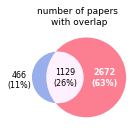

In [54]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (2.5,2)

fig, axesi = plt.subplots()

create_venn(axesi, attrited_color, nonattrited_color)

plt.tight_layout()

## Reasons of retraction

In [55]:
def create_reasons_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'ReasonPropagatedMajorityOfMajority'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGPID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGPID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    # Creating an order
    reasons = ['misconduct','plagiarism','mistake','other']
    mapping = {elem: i for i, elem in enumerate(reasons)}
    key_attrited = df_attrited_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_percent[field_of_interest].map(mapping)
    
    df_attrited_percent = df_attrited_percent.iloc[key_attrited.argsort()]
    df_nonattrited_percent = df_nonattrited_percent.iloc[key_nonattrited.argsort()]
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('reason of retraction', fontsize=labelsize)
    axesi.set_xlabel('% papers', fontsize=labelsize)

    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)

    #ax.set_xticks(x, labels)
    # ax.legend()
    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,10,20,30,40])
    
    axesi.tick_params(labelsize=ticksize)
    
    yticklabels = df_nonattrited_percent[field_of_interest].tolist()
    
    axesi.set_yticklabels(yticklabels)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()

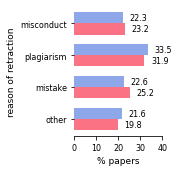

In [56]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (2.53,2.5)

fig, axesi = plt.subplots()

ticksize = 8
labelsize = 9

barwidth = 0.35

create_reasons_plot(axesi, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

plt.tight_layout()

In [57]:
num_authors_reason_concatenated = df_concatenated[['MAGPID','ReasonPropagatedMajorityOfMajority']]\
                                    .drop_duplicates().shape[0]

print(num_authors_reason_concatenated)

(df_concatenated[['MAGPID','ReasonPropagatedMajorityOfMajority']]\
            .drop_duplicates().ReasonPropagatedMajorityOfMajority.value_counts()*100/num_authors_reason_concatenated)\
            .reset_index().rename(columns={'index':'ReasonPropagatedMajorityOfMajority','ReasonPropagatedMajorityOfMajority':'Percentage'})


4267


,Percentage,count
0,plagiarism,32.927115
1,mistake,24.209046
2,misconduct,23.060698
3,other,19.803140


## Year of Retraction

In [58]:
def create_retractionyear_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'DemiDecade'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGPID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGPID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    # Creating an order
    elements = ['1990-1995','1996-2000','2001-2005','2006-2010','2011-2015']
    mapping = {elem: i for i, elem in enumerate(elements)}
    key_attrited = df_attrited_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_percent[field_of_interest].map(mapping)
    
    df_attrited_percent = df_attrited_percent.iloc[key_attrited.argsort()]
    df_nonattrited_percent = df_nonattrited_percent.iloc[key_nonattrited.argsort()]
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('year of retraction', fontsize=labelsize)
    axesi.set_xlabel('% papers', fontsize=labelsize)

    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)

    #ax.set_xticks(x, labels)
    # ax.legend()
    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,20,40,60,80])
    
    axesi.tick_params(labelsize=ticksize)
    
    yticklabels = df_nonattrited_percent[field_of_interest].tolist()
    
    axesi.set_yticklabels(yticklabels)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()

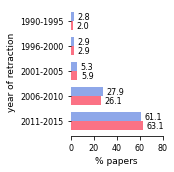

In [59]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (2.53,2.5)

fig, axesi = plt.subplots()

ticksize = 8
labelsize = 9

barwidth = 0.35

create_retractionyear_plot(axesi, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

plt.tight_layout()

## Venue

In [60]:
def create_venue_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'MAGJournalType'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGPID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGPID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    # Creating an order
    elements = ['journal','conference']
    mapping = {elem: i for i, elem in enumerate(elements)}
    key_attrited = df_attrited_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_percent[field_of_interest].map(mapping)
    
    df_attrited_percent = df_attrited_percent.iloc[key_attrited.argsort()]
    df_nonattrited_percent = df_nonattrited_percent.iloc[key_nonattrited.argsort()]
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('venue', fontsize=labelsize)
    axesi.set_xlabel('% papers', fontsize=labelsize)

    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)

    #ax.set_xticks(x, labels)
    # ax.legend()
    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,20,40,60,80,100])
    
    axesi.tick_params(labelsize=ticksize)
    
    yticklabels = df_nonattrited_percent[field_of_interest].tolist()
    
    axesi.set_yticklabels(yticklabels)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()
    
    plt.tight_layout()

In [61]:
def create_venue_plot_horizontal(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'MAGJournalType'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGPID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGPID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    # Creating an order
    elements = ['journal','conference']
    mapping = {elem: i for i, elem in enumerate(elements)}
    key_attrited = df_attrited_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_percent[field_of_interest].map(mapping)
    
    df_attrited_percent = df_attrited_percent.iloc[key_attrited.argsort()]
    df_nonattrited_percent = df_nonattrited_percent.iloc[key_nonattrited.argsort()]
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.bar(r1, df_attrited_percent['Percentage'], 
                     width=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.bar(r2, df_nonattrited_percent['Percentage'], 
                     width=barwidth, color = nonattrited_color, 
                     )
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 10  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            height = rect.get_height()
            text = f"{height:.{precision}f}"
            x = rect.get_x() + rect.get_width() / 2
            y = height + offset
            axesi.text(x, y, text, ha='center', va='center', fontsize=ticksize)
            
        for rect in rects2:
            height = rect.get_height()
            text = f"{height:.{precision}f}"
            x = rect.get_x() + rect.get_width() / 2
            y = height + offset
            axesi.text(x, y, text, ha='center', va='center', fontsize=ticksize)
     
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('% papers', fontsize=labelsize)
    axesi.set_xlabel('venue', fontsize=labelsize)

    axesi.set_facecolor('white')

    xticks = [(xi+xj)/2 for (xi,xj) in zip(r1,r2)]

    axesi.set_xticks(xticks)

    
    axesi.tick_params(labelsize=ticksize)
    
    xticklabels = df_nonattrited_percent[field_of_interest].tolist()
    
    axesi.set_xticklabels(xticklabels)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)
    
    plt.tight_layout()

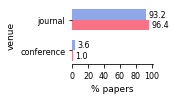

In [62]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (2.53,1.5)

fig, axesi = plt.subplots()

ticksize = 8
labelsize = 9

barwidth = 0.35

create_venue_plot(axesi, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

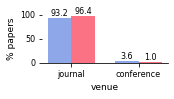

In [63]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (2.53,1.5)

fig, axesi = plt.subplots()

ticksize = 8
labelsize = 9

barwidth = 0.35

create_venue_plot_horizontal(axesi, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

## Journal Ranking

In [64]:
def create_journalranking_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'SJRQuartileRetractedPaperYear'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGPID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGPID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    
    # Creating an order
    elements = ['Q1','Q2','Q3','Q4','NA']
    mapping = {elem: i for i, elem in enumerate(elements)}
    key_attrited = df_attrited_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_percent[field_of_interest].map(mapping)
    
    df_attrited_percent = df_attrited_percent.iloc[key_attrited.argsort()]
    df_nonattrited_percent = df_nonattrited_percent.iloc[key_nonattrited.argsort()]
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('journal or conference\nranking', fontsize=labelsize)
    axesi.set_xlabel('% papers', fontsize=labelsize)

    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)

    #ax.set_xticks(x, labels)
    # ax.legend()
    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,20,40,60])
    
    axesi.tick_params(labelsize=ticksize)
    
    yticklabels = df_nonattrited_percent[field_of_interest].tolist()
    
    axesi.set_yticklabels(yticklabels)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()

In [65]:
def create_journalranking_plot_horizontal(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'SJRQuartileRetractedPaperYear'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGPID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGPID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    
    # Creating an order
    elements = ['Q1','Q2','Q3','Q4','NA']
    mapping = {elem: i for i, elem in enumerate(elements)}
    key_attrited = df_attrited_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_percent[field_of_interest].map(mapping)
    
    df_attrited_percent = df_attrited_percent.iloc[key_attrited.argsort()]
    df_nonattrited_percent = df_nonattrited_percent.iloc[key_nonattrited.argsort()]
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.bar(r1, df_attrited_percent['Percentage'], 
                     width=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.bar(r2, df_nonattrited_percent['Percentage'], 
                     width=barwidth, color = nonattrited_color, 
                     )
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 10  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            height = rect.get_height()
            text = f"{height:.{precision}f}"
            x = rect.get_x() + rect.get_width() / 2
            y = height + offset
            axesi.text(x, y, text, ha='center', va='center', fontsize=ticksize)
            
        for rect in rects2:
            height = rect.get_height()
            text = f"{height:.{precision}f}"
            x = rect.get_x() + rect.get_width() / 2
            y = height + offset
            axesi.text(x, y, text, ha='center', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_xlabel('journal or conference\nranking', fontsize=labelsize)
    axesi.set_ylabel('% papers', fontsize=labelsize)

    axesi.set_facecolor('white')

    xticks = [(xi+xj)/2 for (xi,xj) in zip(r1,r2)]

    axesi.set_xticks(xticks)
    
    axesi.tick_params(labelsize=ticksize)
    
    xticklabels = df_nonattrited_percent[field_of_interest].tolist()
    
    axesi.set_xticklabels(xticklabels)
    
    axesi.spines[['right', 'top']].set_visible(False)


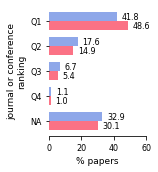

In [66]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (2.3,2.5)

fig, axesi = plt.subplots()

ticksize = 8
labelsize = 9

barwidth = 0.35

create_journalranking_plot(axesi, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)


plt.tight_layout()

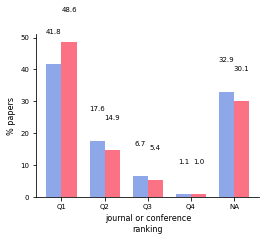

In [67]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (4,3)

fig, axesi = plt.subplots()

ticksize = 7
labelsize = 8

barwidth = 0.35

create_journalranking_plot_horizontal(axesi, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

In [68]:
df_main[~df_main.SJRQuartileRetractedPaperYear.isna() & ~df_main.AttritedClass.eq(-1)].MAGAID.nunique()

9099

In [69]:
df_main[~df_main.SJRQuartileRetractedPaperYear.isna() & ~df_main.AttritedClass.eq(-1)]['Record ID'].nunique()

2954

In [70]:
df_main[~df_main.SJRQuartileRetractedPaperYear.isna()][['MAGAID','AttritedClass']].drop_duplicates()\
        .AttritedClass.value_counts()

AttritedClass
 0    7461
 1    1638
-1    1280
Name: count, dtype: int64

In [71]:
df_main[~df_main.AttritedClass.isin([1,-1])]['Record ID'].nunique()

3801

In [72]:
df_main[~df_main.AttritedClass.isin([1,-1])].MAGAID.nunique()

10342

## Number of authors

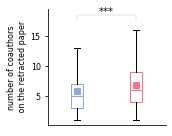

In [73]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

plt.rcParams["figure.figsize"] = (2.5,2)

fig, axesi = plt.subplots()

def create_numauthors_boxplot(axesi):

    ticksize = 8
    labelsize = 9

    barwidth = 0.35

    field_of_interest = 'NumAuthorsInRetractedPaper'
    ylabel = 'number of coauthors\n on the retracted paper'

    create_box_plot(field_of_interest, ylabel, axesi, barwidth, ticksize, labelsize,
                           attrited_color, nonattrited_color, other_color, remove_outliers=True,
                          handle_gaps=[1,2])

create_numauthors_boxplot(axesi)
plt.tight_layout()

# Attrition bar plot (Figure a)

Percentage outside of range 11.081339713000002


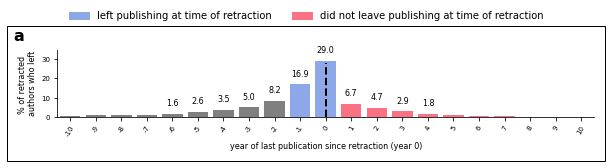

In [74]:
from matplotlib.gridspec import GridSpec
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'
import matplotlib.patches as patches

ticksize = 8
labelsize = 9

ticksize = 7
labelsize = 8

# Define a 1x1 grid
fig = plt.figure(figsize=(8.3,1.7))


gs = fig.add_gridspec(1,1)

# Discipline plot 12 bars
axesi = fig.add_subplot(gs[:, :])

create_attrition_barplot(axesi, ticksize, labelsize, attrited_color,
                        nonattrited_color, other_color)

legend_handles = [patches.Rectangle((0,0),1,1, color=attrited_color),
                  patches.Rectangle((0,0),1,1, color=nonattrited_color)]
legend_labels = ['left publishing at time of retraction', 'did not leave publishing at time of retraction']

fig.legend(handles=legend_handles, labels=legend_labels, loc='upper center', ncol=2,
          bbox_to_anchor=(0.5, 1.3), frameon=False)

rect = Rectangle((0, 0), 1, 1.1, transform=fig.transFigure, fill=False, edgecolor='black')
fig.patches.append(rect)

fig.text(rect.get_x()+0.01, rect.get_y() + rect.get_height()-0.02, 'a', fontsize=16, weight='bold',
        ha='left', va='top')

plt.tight_layout()

plt.savefig(OUTDIR+'/attrition_barplot_a_new.pdf',format='pdf', bbox_inches='tight')



# Merged plot: Author attributes (Figure b)

        MAGFieldName  Percentage
0            biology   28.965517
2          chemistry   20.041797
1           medicine   22.528736
4            physics    8.213166
3  other STEM fields   18.307210
5    non-STEM fields    1.943574


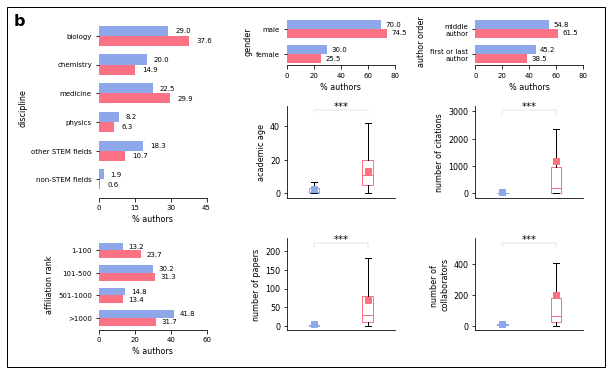

In [75]:
from matplotlib.patches import Rectangle

attrited_color = '#8EA7E9'
nonattrited_color = "#fb7285"
other_color = 'gray'

fig = plt.figure(figsize=(8.3,5))

ticksize = 7
labelsize = 8

gs = fig.add_gridspec(8,6)
# Discipline plot 12 bars
ax1 = fig.add_subplot(gs[:5, :2])
# Affiliation rank 8 bars
ax2 = fig.add_subplot(gs[5:, :2])
# Gender 4 bars
ax3 = fig.add_subplot(gs[:2, 2:4])
# Career age box 
ax4 = fig.add_subplot(gs[2:5, 2:4])
# Papers box
ax5 = fig.add_subplot(gs[5:, 2:4])
# Author order 4 bars
ax6 = fig.add_subplot(gs[:2, 4:])
# Citationx box
ax7 = fig.add_subplot(gs[2:5, 4:])
# Collab box
ax8 = fig.add_subplot(gs[5:, 4:])


barwidth = 0.35

create_discipline_plot(ax1, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)


create_affrank_plot(ax2, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)


create_gender_plot(ax3, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)


create_age_boxplot(ax4)

create_papers_boxplot(ax5)

create_authororder_plot(ax6, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

create_citations_boxplot(ax7)

create_collaborators_boxplot(ax8)


rect = Rectangle((0, 0), 1, 1, transform=fig.transFigure, fill=False, edgecolor='black')
fig.patches.append(rect)
fig.text(rect.get_x()+0.01, rect.get_y() + rect.get_height()-0.02, 'b', fontsize=16, weight='bold',
        ha='left', va='top')
plt.savefig(OUTDIR+'/merged_author_features_new.pdf',format='pdf', bbox_inches='tight')

## Merged Plot: Paper Attributes

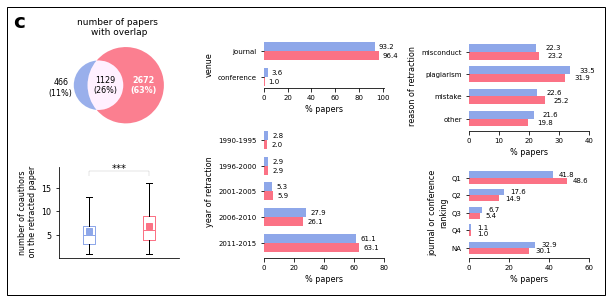

In [76]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

fig = plt.figure(figsize=(8.3,4))

ticksize = 7
labelsize = 8

gs = fig.add_gridspec(6,3)
# Venn diagram
ax1 = fig.add_subplot(gs[:3, :1])
# Venue
ax2 = fig.add_subplot(gs[3:, :1])
# num coauthors
ax3 = fig.add_subplot(gs[:2, 1:2])
# reason
ax4 = fig.add_subplot(gs[2:, 1:2])
# decade
ax5 = fig.add_subplot(gs[:3, 2:])
# journal ranking
ax6 = fig.add_subplot(gs[3:, 2:])

barwidth = 0.35


create_venn(ax1, attrited_color, nonattrited_color)

create_numauthors_boxplot(ax2)

create_venue_plot(ax3, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

create_reasons_plot(ax5, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

create_retractionyear_plot(ax4, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

create_journalranking_plot(ax6, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

rect = Rectangle((0, 0), 1, 1, transform=fig.transFigure, fill=False, edgecolor='black')
fig.patches.append(rect)

fig.text(rect.get_x()+0.01, rect.get_y() + rect.get_height()-0.02, 'c', fontsize=20, weight='bold',
        ha='left', va='top')


plt.tight_layout()

plt.savefig(OUTDIR+'/merged_paper_features_new.pdf',format='pdf', bbox_inches='tight')


